# 11월 21일 일 공부

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fd8d084b730>, <matplotlib.lines.Line2D object at 0x7fd8d084ba90>], 'caps': [<matplotlib.lines.Line2D object at 0x7fd8d084bdf0>, <matplotlib.lines.Line2D object at 0x7fd8f2b8d190>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fd8d084b3d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fd8f2b8d4f0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fd8f2b8d850>], 'means': []})

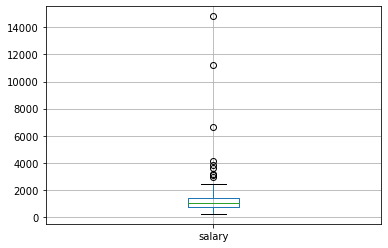

In [2]:
import pandas as pd

data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/Ex_CEOSalary.csv')

# 상자수염 그리기
data.boxplot(column='salary', return_type='both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fd8b0086b80>, <matplotlib.lines.Line2D object at 0x7fd8b0086ee0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fd8b0093130>, <matplotlib.lines.Line2D object at 0x7fd8b0093490>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fd8b00868e0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fd8b00937f0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fd8b0093b50>], 'means': []})

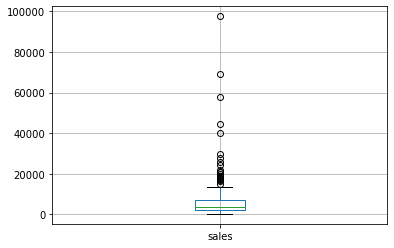

In [3]:
# 상자수염 그리기 - sales 변수
data.boxplot(column='sales', return_type='both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fd8e00a7f40>, <matplotlib.lines.Line2D object at 0x7fd8e00b72e0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fd8e00b7640>, <matplotlib.lines.Line2D object at 0x7fd8e00b79a0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fd8e00a7be0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fd8e00b7d00>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fd8e00c40a0>], 'means': []})

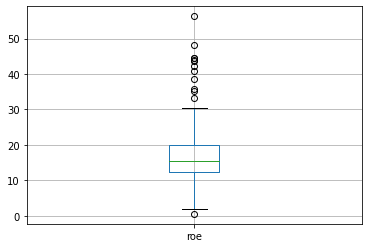

In [4]:
# 상자수염 그리기 - roe 변수
data.boxplot(column='roe', return_type='both')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd880025f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd880034640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd880025be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd880034d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8800400a0>],
 'means': []}

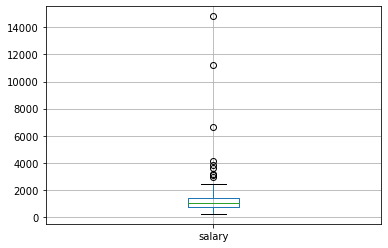

In [6]:
# 상자수염 그리기
data.boxplot(column='salary', return_type='dict')

In [9]:
# salary 변수의 이상치를 IQR값으로 제거 하고자 함
# 1사분위 수
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = abs(Q3_salary - Q1_salary)
IQR_salary

671.0

<AxesSubplot:>

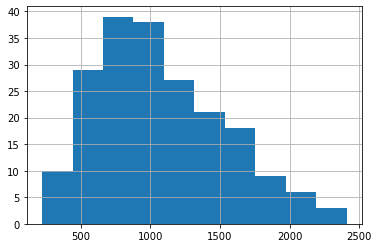

In [10]:
data_IQR = data[(data['salary'] < Q3_salary+IQR_salary*1.5) & (data['salary'] > Q1_salary - IQR_salary*1.5)]
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

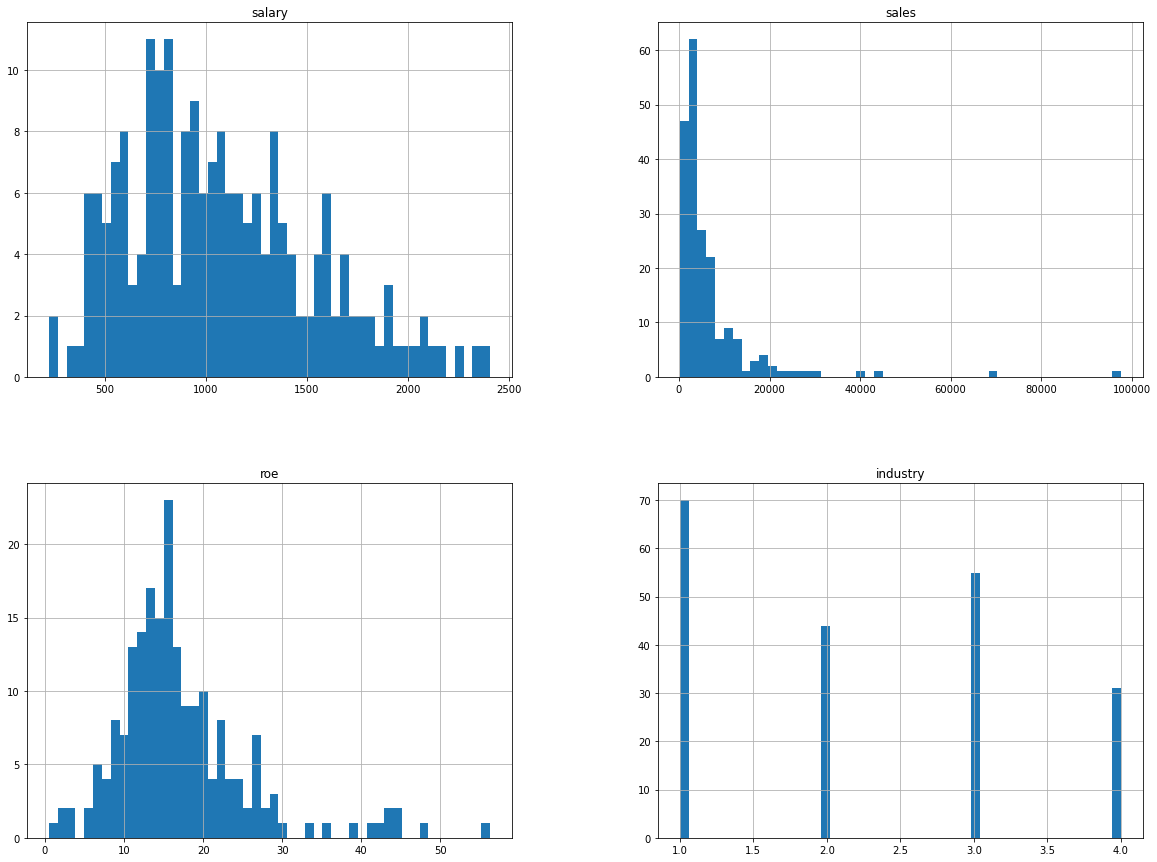

In [12]:
data_IQR.hist(bins=50, figsize=(20,15))

In [13]:
# .corr()
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.335446,0.289704,-0.202648
sales,0.335446,1.000000,-0.065034,-0.069790
roe,0.289704,-0.065034,1.000000,-0.024423
industry,-0.202648,-0.069790,-0.024423,1.000000


In [14]:
# sales변수의 IQR 구하기
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales

4966.6999511718695

In [16]:
# sales 변수에서 IQR값을 기준으로 이상치 제거
# salary 변수에서 IQR값을 기준으로 이상치 제거
# Q3+IQR*1.5 보다 작거나,
# Q1-IQR*1.5 보다 큰 값만 남기기
data_IQR = data[(data['sales'] < Q3_sales+IQR_sales*1.5) & (data['sales'] > Q1_sales - IQR_sales*1.5) &
(data['salary'] < Q3_salary+IQR_salary*1.5) & (data['salary'] > Q1_salary - IQR_salary*1.5)] 

<AxesSubplot:>

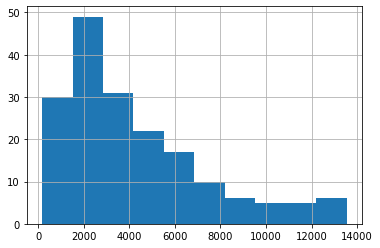

In [17]:
# sales 히스토그램 그리기
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

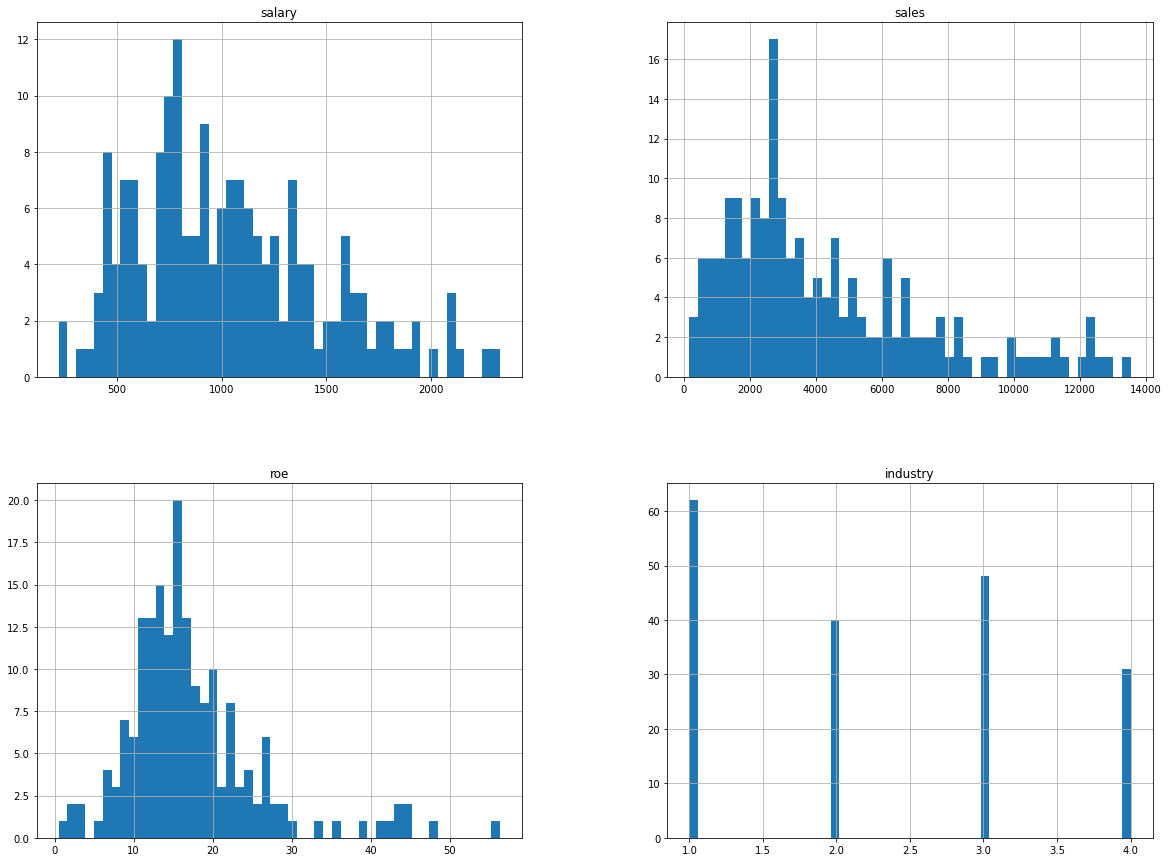

In [18]:
# data_IQR 히스토그램 그리기
data_IQR.hist(bins=50, figsize=(20,15))

In [19]:
# data_IQR 변수 간 상관관계 확인
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.471278,0.299153,-0.223324
sales,0.471278,1.000000,-0.076046,-0.106834
roe,0.299153,-0.076046,1.000000,-0.050202
industry,-0.223324,-0.106834,-0.050202,1.000000


In [20]:
import numpy as np # numpy의 log함수 사용
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,1,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,1,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,1,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,1,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,1,7.221105,9.988894,2.624669


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'industry'}>,
        <AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>],
       [<AxesSubplot:title={'center':'log_roe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

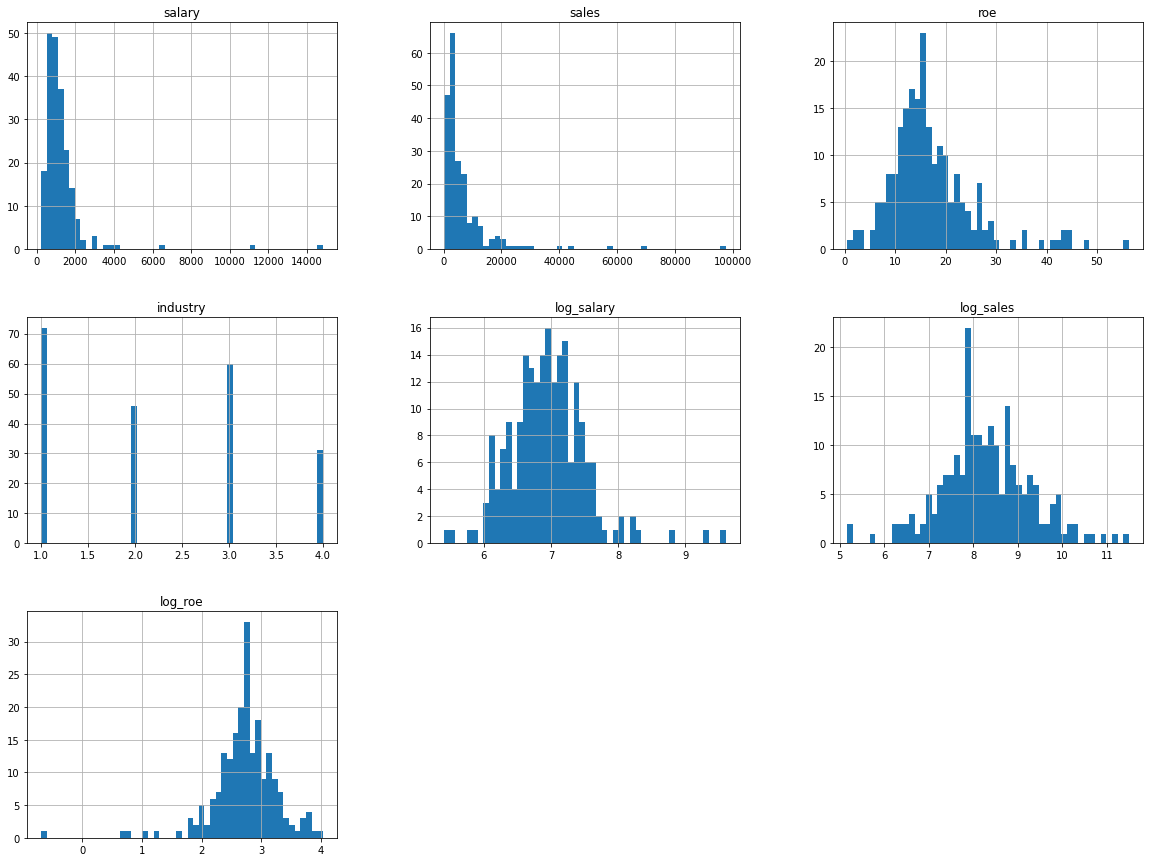

In [24]:
# data의 히스토그램으로 이상치의 이동 확인하기
data.hist(bins=50, figsize=(20,15))

In [25]:
# 상관관계 확인하기
data.corr()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000


In [26]:
# numpy의 sqrt 로 데이터 제곱근한 변수 생성
data['sqrt_salary']=np.sqrt(data['salary'])
data['sqrt_sales']=np.sqrt(data['sales'])
data['sqrt_roe']=np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,1,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,1,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,1,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,1,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,1,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'industry'}>,
        <AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>],
       [<AxesSubplot:title={'center':'log_roe'}>,
        <AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>],
       [<AxesSubplot:title={'center':'sqrt_roe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

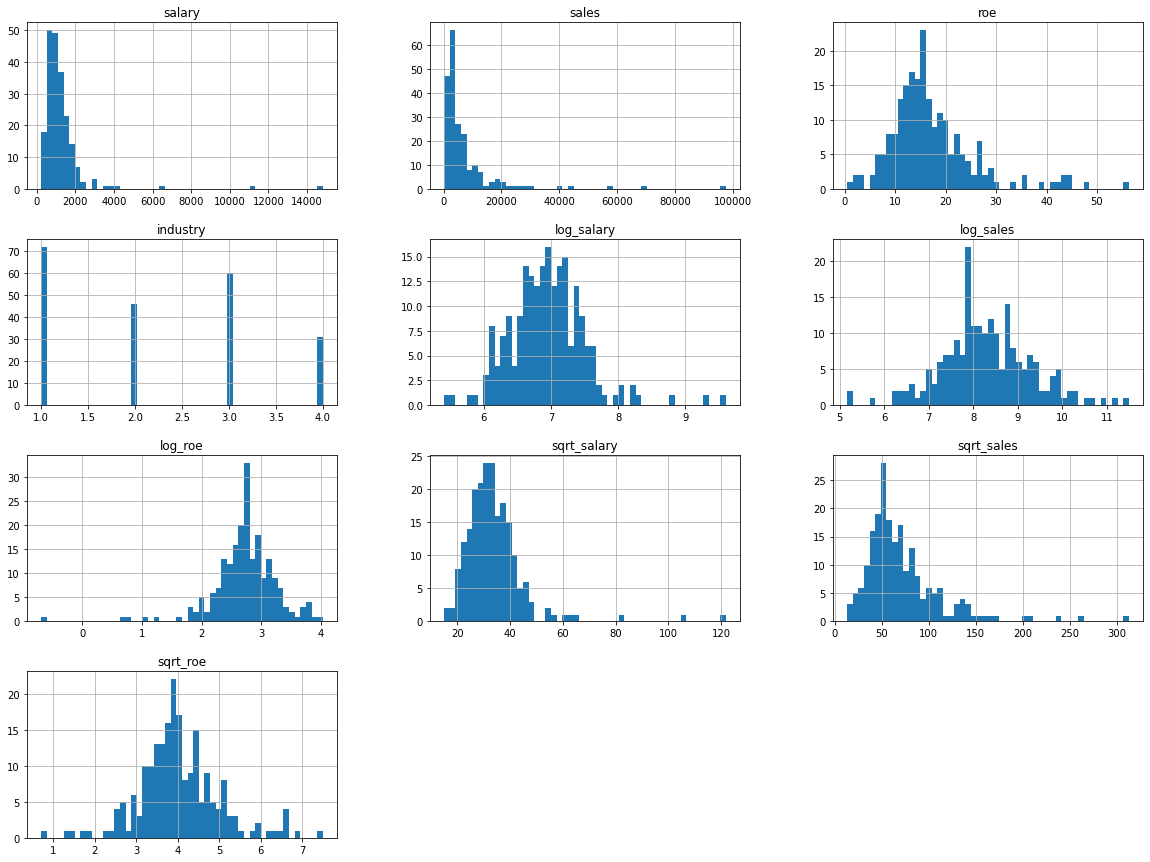

In [29]:
# 히스토그램 확인
data.hist(bins=50, figsize=(20,15))

In [30]:
data.corr()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647,-0.094616,-0.125441,-0.036050
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,-0.094616,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,-0.125441,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,-0.036050,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


In [31]:
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [32]:
pd.isnull(data)
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [33]:
pd.notnull(data)
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [35]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [36]:
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [39]:
data['salary'].isnull().sum()

2

In [40]:
data['salary'].notnull().sum()

8

In [41]:
# 행 단위로 결측값 갯수 구하기
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [42]:
# 새로운 변수 Missing 에 행단위의 결측값 갯수 할당하기
data['Missing'] = data.isnull().sum(1)
data

,salary,sales,roe,industry,Missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [43]:
del data['Missing']

data['valid'] = data.notnull().sum(1)
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [44]:
 # 결측값이 있는 행 제거
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
3,578.0,16246.000000,5.900000,1,4
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4


In [45]:
# 결측값이 있는 열(column/variable 제거)
data_del_col = data.dropna(axis=1)
data_del_col

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


In [46]:
# 결측값이 있는 특정 행/열 제거
data[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [47]:
# 네가지 변수 중에 결측치가 하나라도 있는 케이스를 제거
data[['salary','sales','roe','industry']].dropna()


,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [48]:
#	네가지 변수 중에 결측치가 하나라도 있는 열을 제거 (axis=1)
data[['salary','sales','roe','industry']].dropna(axis=1)


,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


In [49]:
# 특정 값으로 대체

data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,0.0,9958.000000,10.900000,1,3
2,0.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,0.000000,13.800000,1,3
5,1145.0,0.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,0.000000,2,3


In [50]:
# 특정 문자로 대체
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry,valid
0,1095.0,27595.0,14.1,1,4
1,missing,9958.0,10.9,1,3
2,missing,6125.899902,23.5,1,3
3,578.0,16246.0,5.9,1,4
4,1368.0,missing,13.8,1,3
5,1145.0,missing,20.0,2,3
6,1078.0,2266.699951,16.4,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.5,2,4
9,833.0,2830.0,missing,2,3


In [51]:
# df.fillna(method='ffill')
data_ffill = data.fillna(method='ffill')
data_ffill

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1095.0,9958.000000,10.900000,1,3
2,1095.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,16246.000000,13.800000,1,3
5,1145.0,16246.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,10.500000,2,3


In [52]:
# df.fillna(method='pad')
data_pad = data.fillna(method='pad')
data_pad

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1095.0,9958.000000,10.900000,1,3
2,1095.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,16246.000000,13.800000,1,3
5,1145.0,16246.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,10.500000,2,3


In [53]:
# df.fillna(method = 'bfill')
data_bfill = data.fillna(method='bfill')
data_bfill

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,578.0,9958.000000,10.900000,1,3
2,578.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,2266.699951,13.800000,1,3
5,1145.0,2266.699951,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [54]:
# df.fillna(method='backfill')
data_backfill = data.fillna(method='backfill')
data_backfill

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,578.0,9958.000000,10.900000,1,3
2,578.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,2266.699951,13.800000,1,3
5,1145.0,2266.699951,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [55]:
# 평균 대체
data_mean = data.fillna(data.mean())
data_mean

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1053.5,9958.000000,10.900000,1,3
2,1053.5,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,9069.825012,13.800000,1,3
5,1145.0,9069.825012,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,14.600000,2,3


In [56]:
# 중위수 대체
data_median = data.fillna(data.median())
data_median

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1094.5,9958.000000,10.900000,1,3
2,1094.5,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,5348.050049,13.800000,1,3
5,1145.0,5348.050049,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,14.100000,2,3


In [57]:
# 최소값 대체
data_min = data.fillna(data.min())
data_min

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,578.0,9958.000000,10.900000,1,3
2,578.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,2266.699951,13.800000,1,3
5,1145.0,2266.699951,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,5.900000,2,3


In [58]:
# 최대값 대체
data_max = data.fillna(data.max())
data_max 

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,1368.0,9958.000000,10.900000,1,3
2,1368.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,27595.000000,13.800000,1,3
5,1145.0,27595.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,23.500000,2,3


In [59]:
# 다른 변수 값으로 대체
import numpy as np
data2 = data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True , data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,valid,sales_new
0,1095.0,27595.000000,14.100000,1,4,27595.000000
1,NaN,9958.000000,10.900000,1,3,9958.000000
2,NaN,6125.899902,23.500000,1,3,6125.899902
3,578.0,16246.000000,5.900000,1,4,16246.000000
4,1368.0,NaN,13.800000,1,3,1368.000000
5,1145.0,NaN,20.000000,2,3,1145.000000
6,1078.0,2266.699951,16.400000,2,4,2266.699951
7,1094.0,2966.800049,16.299999,2,4,2966.800049
8,1237.0,4570.200195,10.500000,2,4,4570.200195
9,833.0,2830.000000,NaN,2,3,2830.000000


In [60]:
# industry 별로 그룹을 묶어 평균을 확인하기
data.groupby('industry').mean()

,salary,sales,roe,valid
industry,,,,
1,1013.666667,14981.224975,13.64,3.4
2,1077.400000,3158.425049,15.80,3.6


In [62]:
# lambda 함수 사용
fill_mean_func = lambda g : g.fillna(g.mean())

# apply()에 lambda 함수 적용하여 집단별 평균 구함
data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry  valid
industry                                                         
1        0  1095.000000  27595.000000  14.100000         1      4
         1  1013.666667   9958.000000  10.900000         1      3
         2  1013.666667   6125.899902  23.500000         1      3
         3   578.000000  16246.000000   5.900000         1      4
         4  1368.000000  14981.224975  13.800000         1      3
2        5  1145.000000   3158.425049  20.000000         2      3
         6  1078.000000   2266.699951  16.400000         2      4
         7  1094.000000   2966.800049  16.299999         2      4
         8  1237.000000   4570.200195  10.500000         2      4
         9   833.000000   2830.000000  15.800000         2      3

In [63]:
# 그룹별로 특정값 설정
fill_values = {1:2000 , 2: 2000}

# lambda 함수를 이용해 설정 기준을 함수로 만듦
fill_func = lambda d : d.fillna(fill_values[d.name])

# 집단별 설정 함수를 apply()
data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,2000.0,9958.000000,10.900000,1,3
2,2000.0,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,2000.000000,13.800000,1,3
5,1145.0,2000.000000,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,2000.000000,2,3
